In [31]:
import pandas as pd
import numpy as np
np.random.seed(5)

In [32]:
train = pd.read_csv('../Data/basketball_train.csv')
test = pd.read_csv('../Data/basketball_test.csv')

In [33]:
train.head()

,Player,Pos,3P,TRB,BLK
0,Evan Fournier,SG,1.9,3.1,0.1
1,Klay Thompson,SG,3.4,3.7,0.5
2,Josh Richardson,SG,1.4,3.2,0.7
3,Nik Stauskas,SG,1.7,2.8,0.4
4,J.R. Smith,SG,2.3,2.8,0.3


In [34]:
test.head()

,Player,Pos,3P,TRB,BLK
0,Dion Waiters,SG,1.8,3.3,0.4
1,Jason Smith,C,0.5,3.5,0.7
2,Al Horford,C,1.3,6.8,1.3
3,Denzel Valentine,SG,1.3,2.6,0.1
4,Marcin Gortat,C,0.0,10.4,0.7


In [35]:
print(train.shape)
print(test.shape)

(80, 5)
(20, 5)


In [36]:
print(train.isnull().sum())
print(test.isnull().sum())

Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64
Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64


---
### 최적의 k찾기(교차검증 : cross validation)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score # 교차검증

In [38]:
# 최적의 k를 찾기 위해 교차 검증을 수행할 k의 범위를 3부터 학습데이터의 절반까지 지정
max_k_range = train.shape[0] // 2
max_k_range

40

In [39]:
# 최적의 k를 찾기 위해 범위 확인
k_list = [i for i in range(3, max_k_range, 2)]
k_list

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [40]:
# 점수 저장 및 Train Data 정의
cross_validation_scores = []
X_train = train[['3P','BLK','TRB']]
y_train = train['Pos']

In [41]:
# 교차 검증(10-fold)을 각 k를 대상으로 수정해 검증 결과를 저장 
# KNN에서 k 찾기 
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn, # 모델
        X_train, # feature data
        y_train, # target data
        cv = 10, # cross validation : 교차 검증 횟수
        scoring='accuracy'
    )

    # score가 10개가 쌓이니까 이거의 평균값을 내는 것이다. 
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.9125,
 0.9125,
 0.925,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.925,
 0.925,
 0.9125,
 0.9,
 0.8875,
 0.8625,
 0.8625,
 0.8625,
 0.85,
 0.8375]

In [42]:
# 가장 예측력이 높은 k를 고르자
csv = cross_validation_scores

# 순서가 9번째가 아니라 k가 9라는 것이다. 
k_list[csv.index(max(cross_validation_scores))]

9

In [43]:
import matplotlib.pyplot as plt

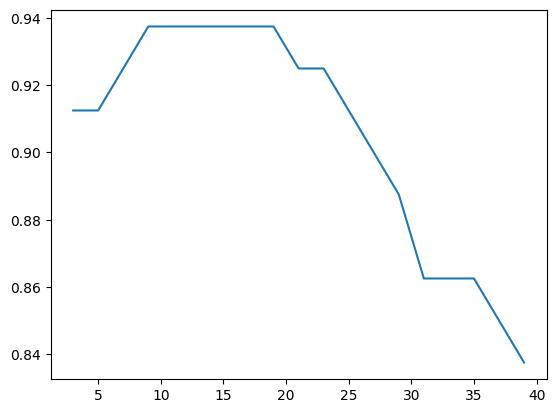

In [45]:
plt.plot(
    k_list,
    cross_validation_scores
)

plt.show()

In [46]:
knn = KNeighborsClassifier(n_neighbors=9)

---
### 2개의 특징으로 예측하기(3점슛 , 블로킹)

In [49]:
X_train = train[['3P','BLK']]
y_train = train['Pos']

X_test = test[['3P','BLK']]
y_test = test['Pos']

In [48]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [50]:
knn.score(X_test,y_test)

0.95

In [52]:
pred = knn.predict(X_test)
pred

array(['SG', 'C', 'C', 'SG', 'C', 'C', 'SG', 'C', 'SG', 'SG', 'SG', 'SG',
       'C', 'SG', 'C', 'C', 'SG', 'SG', 'C', 'C'], dtype=object)

### 2개의 특징으로 예측하기 - 혼동 행렬 만들기

In [53]:
# 정오표 만들기 
comparision = pd.DataFrame(
    {
        '예측값' : pred,
        '실제값' : y_test
    }
)

In [56]:
# 내가 한거
comparision.pivot_table(index='실제값',columns='예측값',aggfunc='size')

예측값,C,SG
실제값,,
C,10.0,1.0
SG,NaN,9.0


In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

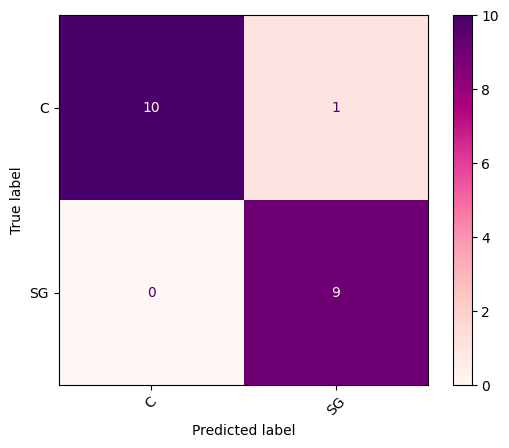

In [59]:
# metrics 이용한 혼동 행렬
confusion_matrix1 = confusion_matrix(y_test,pred)
target_name = ['C','SG']
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix1,
    display_labels=target_name
)

disp.plot(
    cmap=plt.cm.RdPu,
    xticks_rotation=45
)

plt.show()

---
### 3개의 특징으로 예측하기 (3점슛, 블로킹 , 리바운드)

In [60]:
X_train = train[['3P','BLK','TRB']]
y_train = train['Pos']

X_test = test[['3P','BLK','TRB']]
y_test = test['Pos']

In [65]:
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.85

In [61]:
pred = knn.predict(X_test)
pred

array(['SG', 'C', 'C', 'SG', 'C', 'C', 'SG', 'C', 'SG', 'SG', 'C', 'SG',
       'C', 'SG', 'C', 'C', 'C', 'SG', 'C', 'C'], dtype=object)

In [62]:
# 정오표 만들기 
comparision = pd.DataFrame(
    {
        '예측값' : pred,
        '실제값' : y_test
    }
)

In [63]:
comparision.pivot_table(index='실제값',columns='예측값',aggfunc='size')

예측값,C,SG
실제값,,
C,10,1
SG,2,7


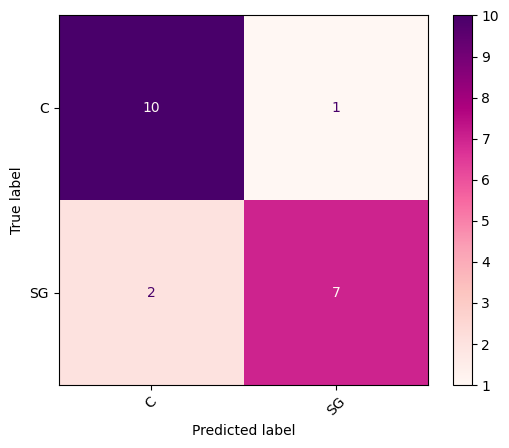

In [64]:
# metrics 이용한 혼동 행렬
confusion_matrix1 = confusion_matrix(y_test,pred)
target_name = ['C','SG']
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix1,
    display_labels=target_name
)

disp.plot(
    cmap=plt.cm.RdPu,
    xticks_rotation=45
)

plt.show()

### 3점슛 : 3.4 , 블로킹 : 0.5 , 리바운드 : 3.7 인 데이터의 포지션이 어디가 좋을까??

In [66]:
knn.predict([[3.4,0.5,3.7]])

/Users/kwonsoonhyong/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['SG'], dtype=object)